# 결정트리와 랜덤 포레스트

In [1]:
from preamble import *

## 결정트리
- 장점 : 전처리에 민감하지 않음
- 단점 : 과대적합에 취약 왜? 데이터에 너무 민감해서

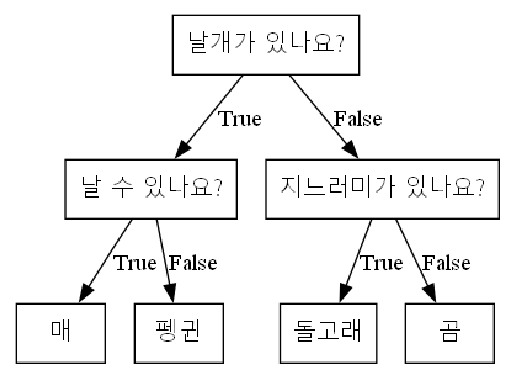

In [2]:
# 결정트리 예제
# TODO: 한국어 깨짐
mglearn.plots.plot_animal_tree()

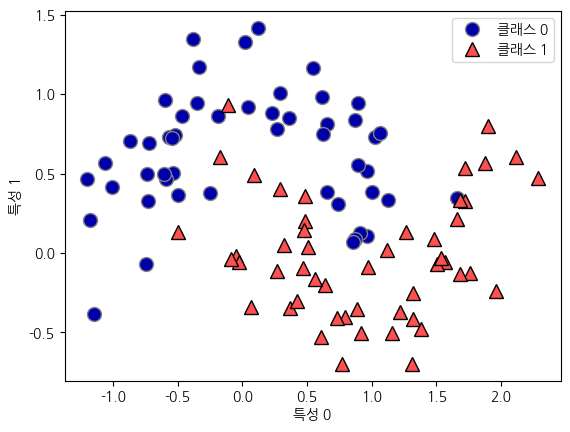

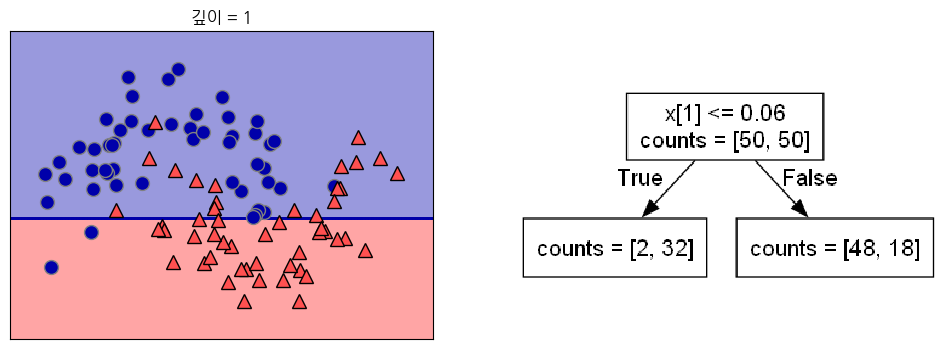

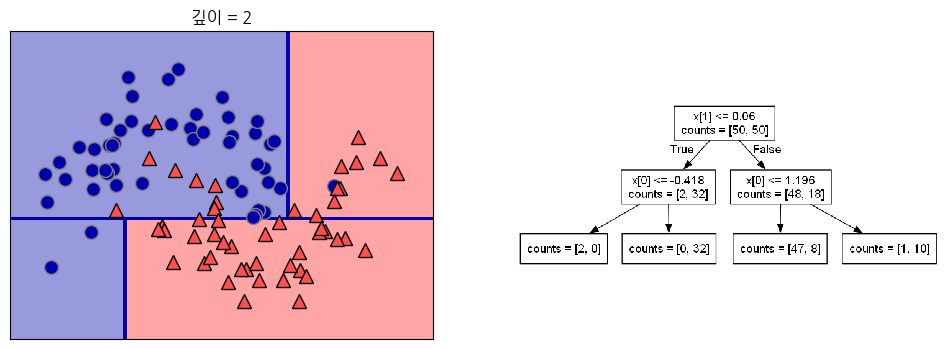

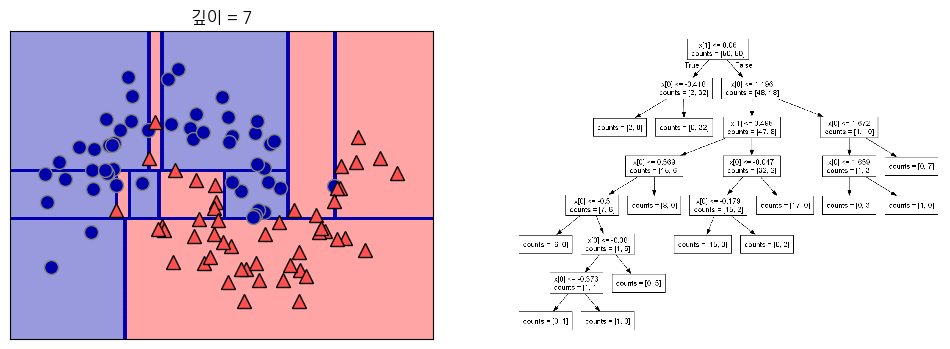

In [3]:
# 결정트리 과정을 시각적으로 보여줌
mglearn.plots.plot_tree_progressive()

### 일반적인 결정트리

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_tarin, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_tarin,y_train)
print(tree.score(X_tarin,y_train),tree.score(X_test,y_test))

0.9882629107981221 0.9440559440559441


### 결정트리 시각화

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=["악성","양성"], 
                feature_names=cancer.feature_names, 
                impurity= False, 
                filled= True)

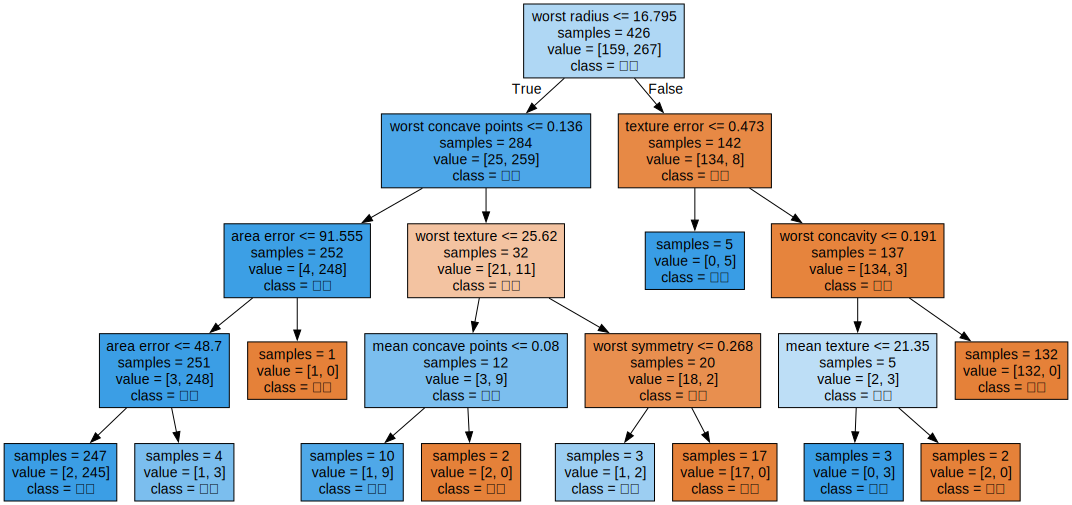

In [6]:
import graphviz
with open("tree.dot", encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 특성 중요도

In [7]:
def plot_feat_importances(model):
    n_feat = cancer.data.shape[1]
    plt.barh(np.arange(n_feat), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_feat), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_feat)

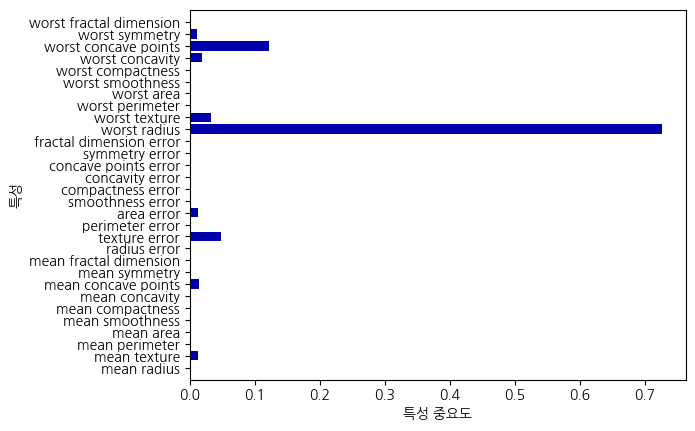

In [8]:
plot_feat_importances(tree)

In [9]:
tree.feature_importances_

array([0.   , 0.013, 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.   ,
       0.   , 0.   , 0.048, 0.   , 0.013, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.727, 0.033, 0.   , 0.   , 0.   , 0.   , 0.018,
       0.122, 0.012, 0.   ])

## 랜덤 포레스트

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X_tarin, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_tarin,y_train)
print(rfc.score(X_tarin,y_train),rfc.score(X_test,y_test))

1.0 0.958041958041958


In [11]:
from sklearn.tree import export_graphviz

# 예측기 1개를 선택
# TODO: forest 전체값으로 변경
for tree in rfc.estimator_:
    export_tree = export_graphviz(tree,
                                  out_file=None,
                                  feature_names=cancer.feature_names, 
                                  special_characters=True,
                                  precision=1,
                                  rotate=True,
                                  filled= True)
    # display(graphviz.Source(export_tree))

TypeError: 'DecisionTreeClassifier' object is not iterable

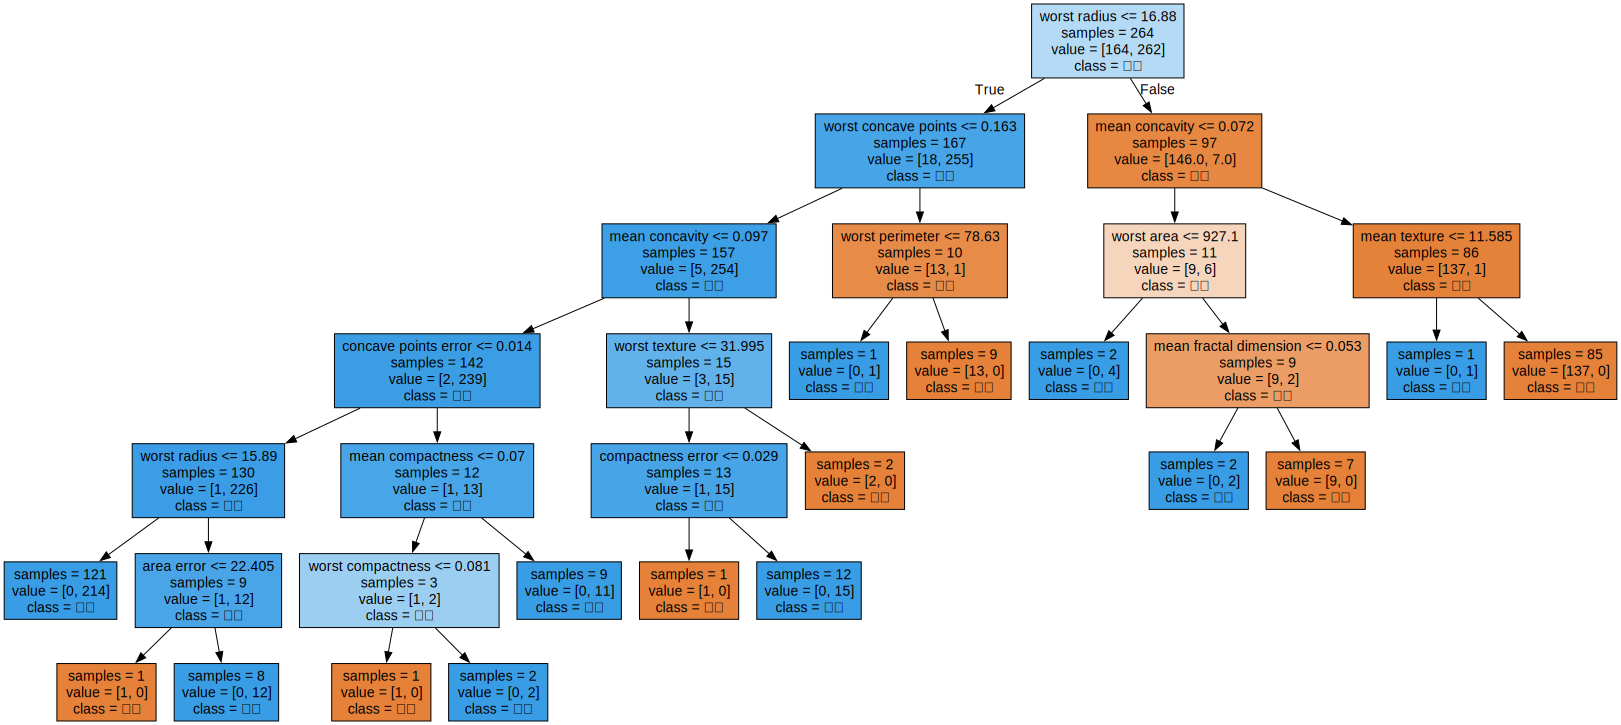

In [12]:
import graphviz
with open("forest.dot", encoding="UTF-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

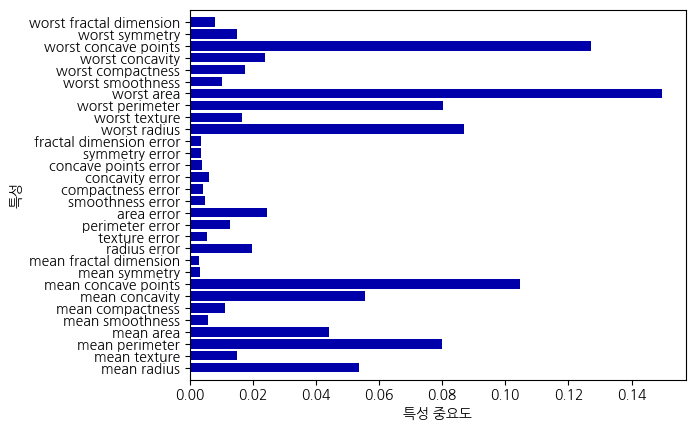

In [13]:
plot_feat_importances(rfc)

In [14]:
mglearn.plots.plot_2d_separator(forest, cancer.data, fill=True, ax=axes[-1,1], alpha=)

SyntaxError: expected argument value expression (3679413485.py, line 1)

## 예제(회귀)

In [15]:
ram_prices = pd.read_csv("data/ram_price.csv")
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
...,...,...,...
328,328,2015.58,4.50e-03
329,329,2015.67,4.30e-03
330,330,2015.75,4.20e-03
331,331,2015.83,3.80e-03


## 데이터 시각화

In [16]:
# 이미지 데이터 등 더 선명하게 보이기위한 장치 ipynb에서만 사용가능
%config InlineBackend.figure_format = 'retina'

Text(0.5, 1.0, '램가격 동향')

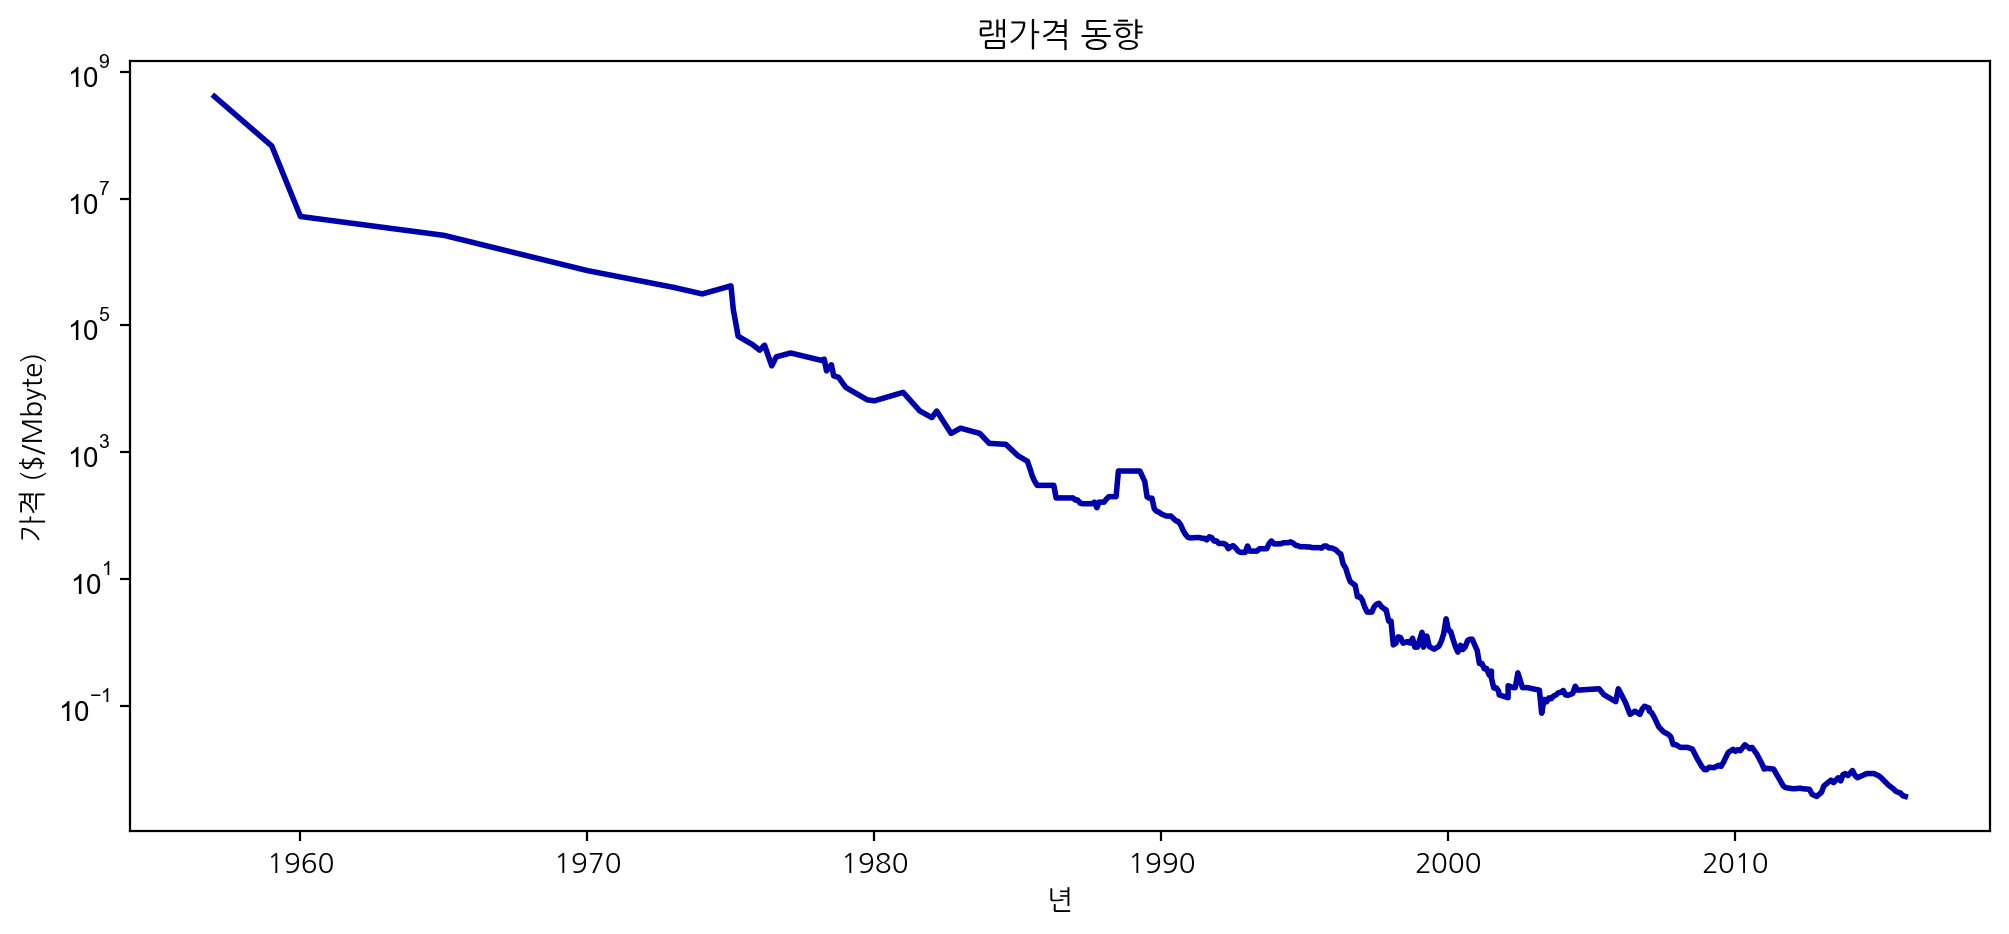

In [17]:
plt.figure(figsize=(12,5))  # 그래프 크기(밑에 하얀거)
plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.title("램가격 동향")

## 데이터 준비

In [18]:
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_tarin = data_train.date.to_numpy()[:,np.newaxis]     # : > 행을 전부 사용, np.newazis > 현재 준 컬럼은 알아서 행렬로 만들어


## 학습

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꾸기
y_train = np.log(data_train.price)  # 이 라인은 데이터준비
tree = DecisionTreeRegressor().fit(X_tarin,y_train)
linear_reg = LinearRegression().fit(X_tarin,y_train)
forest = RandomForestRegressor().fit(X_tarin,y_train)

#예측은 전체 기간에 대해서 수행
X_all = ram_prices.date.to_numpy()[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
pred_forest = forest.predict(X_all)

#예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)
price_forest = np.exp(pred_forest)

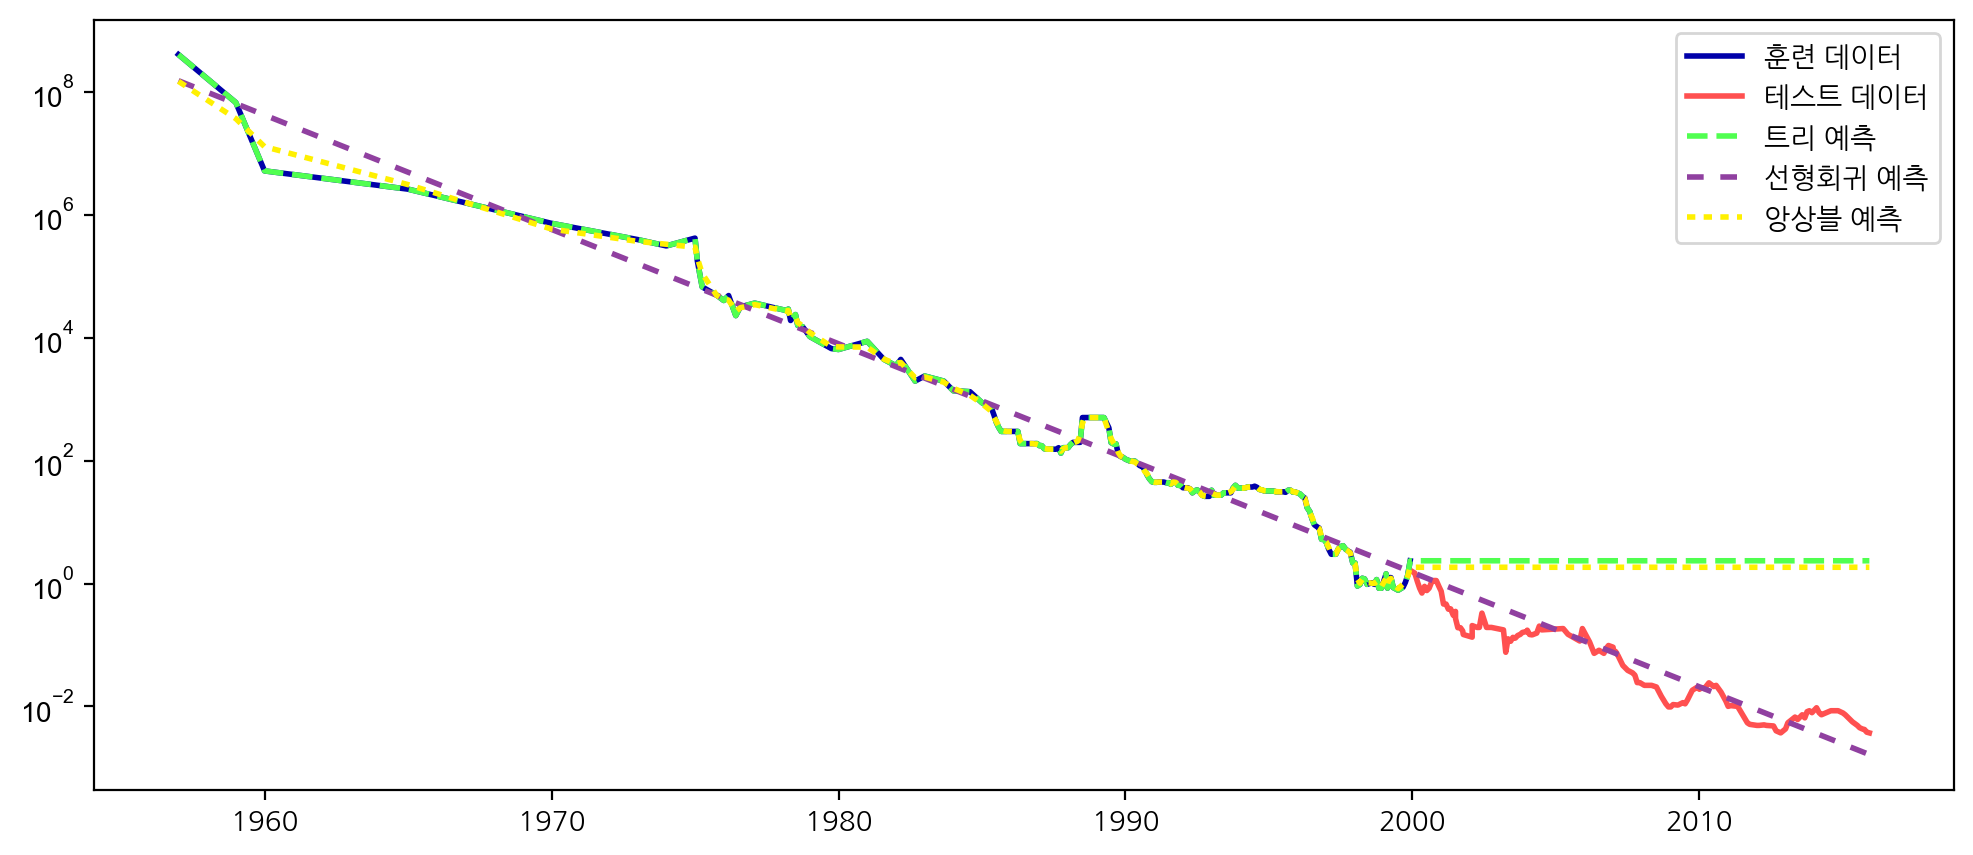

In [20]:
plt.figure(figsize=(12,5))  # 그래프 크기(밑에 하얀거)
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.semilogy(ram_prices.date, price_forest, label="앙상블 예측")
plt.legend()

## SVM

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cancer = load_breast_cancer()
X_tarin, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

svc = SVC()
svc.fit(X_tarin,y_train)
print(svc.score(X_tarin,y_train),svc.score(X_test,y_test))

0.9178403755868545 0.9230769230769231


In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cancer = load_breast_cancer()
X_tarin, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# 전처리 직접(분석시 사용하지 마세요. 3장 참고)

min_on_training = X_tarin.min(axis=0)
range_on_training = (X_tarin-min_on_training).max(axis=0)
X_tarin_scaled = (X_tarin-min_on_training) / range_on_training

min_on_training = X_test.min(axis=0)
range_on_training = (X_test-min_on_training).max(axis=0)
X_test_scaled = (X_test-min_on_training) / range_on_training

svc = SVC()
svc.fit(X_tarin_scaled,y_train)
print(svc.score(X_tarin_scaled,y_train),svc.score(X_test_scaled,y_test))

0.9788732394366197 0.972027972027972


## 예제(회귀)

## 딥러닝

In [23]:
def AND(x1,x2):
    w1,w2, theta = 0.5,0.5,0.7
    tmp = w1*x1+w2*x2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [24]:
print(AND(0,0),AND(0,1),AND(1,0),AND(1,1))

0 0 0 1


In [25]:
def OR(x1,x2):
    w1,w2, theta = 0.5,0.5,0.4
    tmp = w1*x1+w2*x2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [26]:
print(OR(0,0),OR(0,1),OR(1,0),OR(1,1))

0 1 1 1


In [27]:
def NAND(x1,x2):
    w1,w2, theta = 0.5,0.5,0.7
    tmp = w1*x1+w2*x2
    if tmp > theta:
        return 0
    elif tmp <= theta:
        return 1

In [28]:
print(NAND(0,0),NAND(0,1),NAND(1,0),NAND(1,1))

1 1 1 0


In [29]:
def XOR(x1,x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [30]:
print(XOR(0,0),XOR(0,1),XOR(1,0),XOR(1,1))

0 1 1 0
